In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing_extensions import Literal
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, SystemMessage

import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="qwen-2.5-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.00377729, 'queue_time': 0.236907376, 'total_time': 0.05377729}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-3bc8ca83-4c32-47d4-9138-b7991a168e04-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

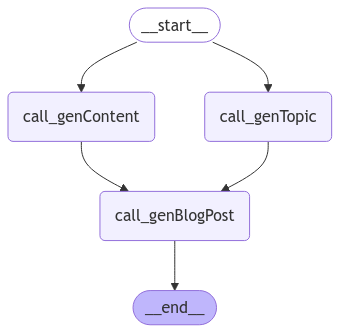

Here is your blogpost on the input agentic aiTopic: Topic: The Ethical Implications and Future Potential of Agentic AI in Decision-Making Roles

In this topic, we delve into the emerging field of agentic AI, which refers to artificial intelligence systems designed to act autonomously and make decisions with a level of independence similar to human agents. This exploration will focus on the ethical considerations that arise when agentic AI is tasked with decision-making roles, particularly in critical sectors such as healthcare, law enforcement, and financial management. Additionally, we will examine the potential benefits and risks associated with the integration of agentic AI into society, including the impact on employment, privacy, and accountability. The discussion will also consider the technical advancements necessary for agentic AI to fulfill these roles effectively and the regulatory frameworks needed to ensure responsible deployment.

 ### The Rise of Agentic AI: A New Era in 

In [8]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class BlogGen(TypedDict):
    input: str
    topic: str
    content : str
    blogpost : str

#nodes
def genTopic(state:BlogGen):
        """Create a topic for the input provided by the user"""
        msg = llm.invoke(f"Generate a topic on the input {state['input']}")
        return {"topic":msg.content}
    
def genBlogContent(state:BlogGen):
        """Create the content for the topic with sections"""
        msg = llm.invoke(f"Create a blog post on the input {state['input']} that includes proper sections")
        return {"content": msg.content}
    
def genBlogPost(state:BlogGen):
        """Combine the topic and blog content to create a blog post"""
        combined = f"Here is your blogpost on the input {state['input']}"
        combined += f"Topic: {state['topic']}\n\n {state['content']}"
        return {"blogpost": combined}

    #Build workflow
builder = StateGraph(BlogGen)

builder.add_node("call_genTopic",genTopic)
builder.add_node("call_genContent", genBlogContent)
builder.add_node("call_genBlogPost", genBlogPost)

builder.add_edge(START, "call_genTopic")
builder.add_edge(START, "call_genContent")
builder.add_edge("call_genTopic", "call_genBlogPost")
builder.add_edge("call_genContent", "call_genBlogPost")
builder.add_edge("call_genBlogPost", END)


wrkflow = builder.compile()
# Show workflow
display(Image(wrkflow.get_graph().draw_mermaid_png()))

# Invoke
state = wrkflow.invoke({"input": "agentic ai"})
print(state["blogpost"])


